

The electronic Hamiltonian in second quantized form is given by:
$ H = \sum_{ij} h_{ij} c_i^\dagger c_j + \frac{1}{2} \sum_{ijkl} h_{ijkl} c_i^\dagger c_j^\dagger c_k c_l $

- **$ h_{ij} $ and $ h_{ijkl} $**: These are Coulombic overlap and exchange integrals determined by the chosen basis set. They represent the interactions between electrons in the system.
- The number of these integrals scales **quartically** with the number of basis orbitals, meaning if the number of basis orbitals is \( n \), the number of integrals scales as \( n^4 \).
- Despite the quartic scaling, these integrals can be efficiently computed using classical computing methods. The actual number of nonzero integrals is often reduced by considering molecular symmetries.

The difficulty lies in the dimension of the Fock space, which scales **exponentially** with the number of basis orbitals. Fock space is the space of all possible states of a system of fermions, like electrons, and its size grows exponentially as the number of basis orbitals increases.

When restricting the problem to a subspace with a fixed number of electrons, the scaling is reduced to being **factorial** with respect to the number of electrons. However, for practical problems, even this reduced scaling remains computationally intractable, making full configuration interaction calculations feasible only for benchmarking purposes.



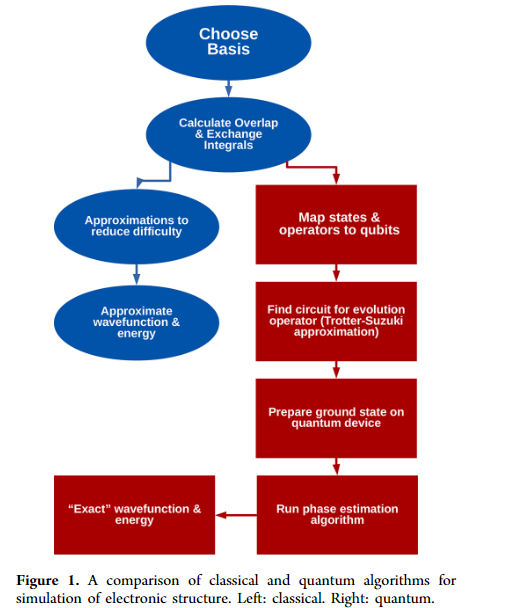

 **the Jordan-Wigner transformation, which is used to convert fermionic operators to qubit (spin) operators. This transformation is crucial for simulating fermionic systems, such as those described by the BCS theory of superconductivity, on quantum computers.**


### Jordan-Wigner Transformation

The Jordan-Wigner transformation is a method to map fermionic creation and annihilation operators to spin-1/2 operators (Pauli matrices). This is important because quantum computers natively operate with qubits, which are two-level quantum systems analogous to spin-1/2 particles. 

### Mapping Fermionic Operators to Qubit Operators

#### Fermionic Operators
For a system of fermions, the creation $c^\dagger$ and annihilation $c$ operators obey specific anticommutation relations:
$ \{ c_i, c_j \} = \{ c_i^\dagger, c_j^\dagger \} = 0 $<br>
$ \{ c_i, c_j^\dagger \} = \delta_{ij} $

<br>

In order to solve this problem in a quantum computer, one needs to map the BCS
Hamiltonian into a qubit Hamiltonian with a one-to-one mapping. In this paper we will
use one of the mappings presented in Wu et al. [12] which maps Fermions to qubits,
given by the following representation
<br>


$ H_Q = \sum_{m=1}^N \frac{\epsilon_m}{2} \sigma^Z_m + \frac{V}{2} \sum_{m=1}^N \sum_{l>m} (\sigma^X_m \sigma^X_l + \sigma^Y_m \sigma^Y_l) $

Here, $H_Q$ is the qubit Hamiltonian representing the BCS model.




### Applying the Jordan-Wigner Transformation

The Jordan-Wigner transformation maps fermionic operators to qubit (spin) operators. The transformation for creation and annihilation operators is given by:

$ c_m = \frac{1}{2} \left( \prod_{j=1}^{m-1} Z_j \right) (X_m - iY_m) $<br>
$ c_m^\dagger = \frac{1}{2} \left( \prod_{j=1}^{m-1} Z_j \right) (X_m + iY_m) $

### Transforming the Single-Particle Term

For the single-particle term $\epsilon_m c_m^\dagger c_m$:

$ c_m^\dagger c_m = \frac{1}{2} \left( 1 - Z_m \right) $

This is because:

$ c_m^\dagger c_m = \frac{1}{2} \left( \prod_{j=1}^{m-1} Z_j \right) (X_m + iY_m) \cdot \frac{1}{2} \left( \prod_{j=1}^{m-1} Z_j \right) (X_m - iY_m) $<br>
$ c_m^\dagger c_m = \frac{1}{2} \left( 1 - Z_m \right) $

Thus, the single-particle term in the qubit basis is:

$ \sum_{m=1}^N \epsilon_m c_m^\dagger c_m = \sum_{m=1}^N \frac{\epsilon_m}{2} (1 - Z_m) = \sum_{m=1}^N \frac{\epsilon_m}{2} - \sum_{m=1}^N \frac{\epsilon_m}{2} Z_m $

The constant term $\sum_{m=1}^N \frac{\epsilon_m}{2}$ can be omitted since it only shifts the energy by a constant amount.

Therefore:

$ \sum_{m=1}^N \epsilon_m c_m^\dagger c_m \approx - \sum_{m=1}^N \frac{\epsilon_m}{2} Z_m $

### Transforming the Interaction Term

For the interaction term $V c_m^\dagger c_l^\dagger c_l c_m$:

$ c_m^\dagger c_l^\dagger c_l c_m = c_m^\dagger (1 - c_l c_l^\dagger) c_m = c_m^\dagger c_m - c_m^\dagger c_l c_l^\dagger c_m $

Using the Jordan-Wigner transformation:

$ c_m^\dagger c_m = \frac{1}{2} (1 - Z_m) $<br>
$ c_m^\dagger c_l c_l^\dagger c_m = \frac{1}{4} \left( X_m + iY_m \right) \left( \prod_{j=m+1}^{l-1} Z_j \right) \left( X_l - iY_l \right) \left( X_l + iY_l \right) \left( \prod_{j=1}^{m-1} Z_j \right) (X_m - iY_m) $

Simplifying, we get:

$ c_m^\dagger c_l c_l^\dagger c_m = \frac{1}{4} \left( X_m + iY_m \right) Z_l \left( X_m - iY_m \right) $<br>
$ = \frac{1}{4} \left( X_m X_l X_m + Y_m Y_l X_m - i X_m X_l Y_m + i Y_m Y_l Y_m \right) $

Since $X_m X_m = Y_m Y_m = I$ and $X_m Y_m = -i Z_m$, we obtain:

$ c_m^\dagger c_l c_l^\dagger c_m = \frac{1}{2} \left( X_m X_l + Y_m Y_l \right) $

### Final Hamiltonian

Combining these results, the qubit Hamiltonian \(H_Q\) becomes:

$ H_Q = \sum_{m=1}^N \frac{\epsilon_m}{2} Z_m + \frac{V}{2} \sum_{m=1}^N \sum_{l>m} \left( X_m X_l + Y_m Y_l \right) $

This is the desired form of the Hamiltonian with the Jordan-Wigner transformation applied:

$ H_Q = \sum_{m=1}^N \frac{\epsilon_m}{2} \sigma^Z_m + \frac{V}{2} \sum_{m=1}^N \sum_{l>m} \left( \sigma^X_m \sigma^X_l + \sigma^Y_m \sigma^Y_l \right) $

Here, $\sigma^X$, $\sigma^Y$, and $\sigma^Z$ are the Pauli matrices representing the qubit operators.

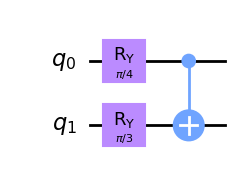

In [5]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np

# Parameters
theta_k = np.pi / 4  # Example value for theta_k
theta_minus_k = np.pi / 3  # Example value for theta_-k

# Initialize a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply R_y rotations
qc.ry(theta_k, 0)
qc.ry(theta_minus_k, 1)

# Apply entangling gate (CNOT)
qc.cx(0, 1)

# Draw the circuit
qc.draw('mpl')



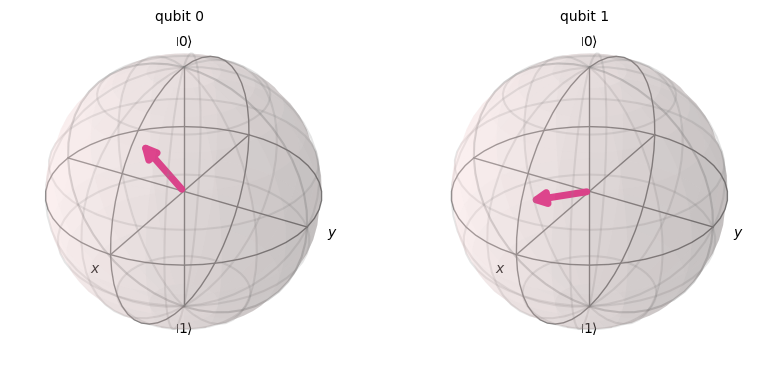

In [6]:
# Execute the circuit on a statevector simulator
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()

# Get the resulting statevector
statevector = result.get_statevector()

# Plot the Bloch multivector
plot_bloch_multivector(statevector)


To understand the representation of Cooper pairs using qubits, let's delve into the concept of state representation and how it helps us determine the presence of a Cooper pair.

### Cooper Pair Representation with Qubits

1. **Electronic Levels and Qubits**: In a superconductor, electrons form pairs known as Cooper pairs. Each electronic level $ k $ can be either occupied by a Cooper pair or unoccupied.

2. **Qubit States**: We use qubits to represent the state of these electronic levels. Each qubit can be in one of two states:
   - $ |0\rangle $: Represents an unoccupied state, meaning no Cooper pair is present in the electronic level $ k $.
   - $ |1\rangle $: Represents an occupied state, meaning a Cooper pair is present in the electronic level $ k $.

### Understanding Cooper Pairs

- **Unoccupied State $( |0\rangle $)**: If a qubit corresponding to a particular electronic level $ k $ is in the state $ |0\rangle $, it signifies that there is no Cooper pair in that level. Essentially, this means the electronic state is empty.
  
- **Occupied State $( |1\rangle $)**: If a qubit corresponding to a particular electronic level $ k $ is in the state $ |1\rangle $, it indicates that a Cooper pair occupies that level. In other words, two electrons with opposite momenta and spins have paired up in this state.

### Visualization

- **Qubit System**: Imagine a system of qubits, each representing a different electronic level:
  $
  \text{Qubit System: } |q_1\rangle |q_2\rangle |q_3\rangle \cdots |q_n\rangle
  $
  where $ q_i $ can be either $ 0 $ or $ 1 $.

- **Example**:
  - $ |0010\rangle $: In this 4-qubit system, only the third qubit is in the \( |1\rangle \) state. This means that only the third electronic level has a Cooper pair, and the others are unoccupied.
  - $ |1100\rangle $: Here, the first and second qubits are in the \( |1\rangle \) state, indicating that the first and second electronic levels have Cooper pairs.



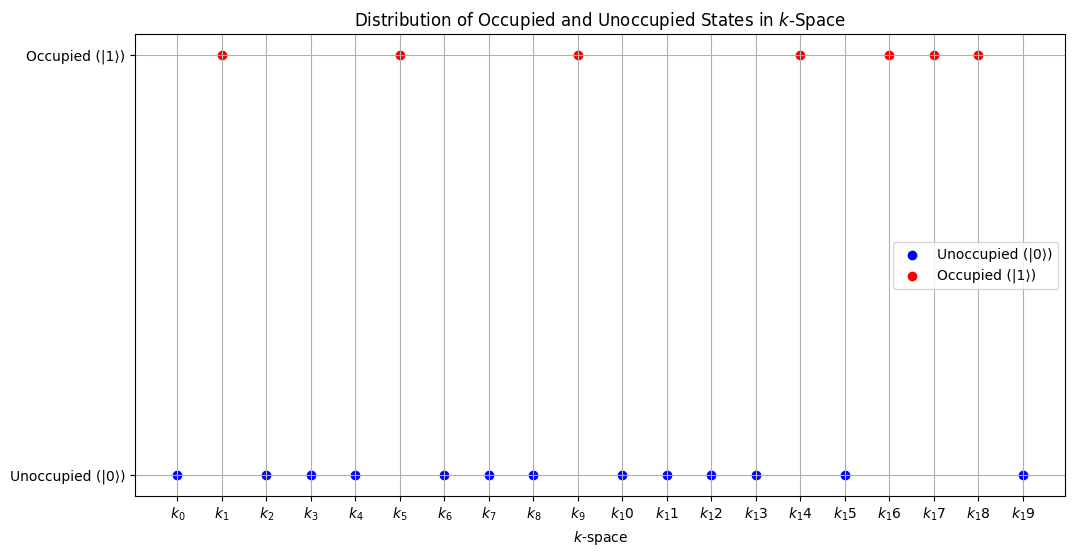

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Number of k points
num_k_points = 20

# Simulate random occupation of states (0: unoccupied, 1: occupied)
np.random.seed(42)  # For reproducibility
states = np.random.choice([0, 1], size=num_k_points)

# Generate k values
k_values = np.arange(num_k_points)

# Plotting the k-space occupation
plt.figure(figsize=(12, 6))
plt.scatter(k_values[states == 0], np.zeros(sum(states == 0)), color='blue', label='Unoccupied (|0⟩)')
plt.scatter(k_values[states == 1], np.ones(sum(states == 1)), color='red', label='Occupied (|1⟩)')
plt.yticks([0, 1], ['Unoccupied (|0⟩)', 'Occupied (|1⟩)'])
plt.xticks(k_values, [f'$k_{i}$' for i in k_values])
plt.xlabel('$k$-space')
plt.title('Distribution of Occupied and Unoccupied States in $k$-Space')
plt.legend()
plt.grid(True)
plt.show()


### How can entanglement be quantified or characterized within the BCS framework?
<br>

### can we see the Cooper pairs like a two level system ?

<br>

### what is channel here ?